<a href="https://colab.research.google.com/github/owenc8/CV_Project_freshVSrotten/blob/test_2/CV_project_bananas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#To-DO
#Convert Txt files to XML and run the code below
#train the data
# -
# -
# get code from: ComputerVisionProject.ipynb and
# YOLOv8_Tutorial.ipynb

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [ ]:
test_dir = '/content/drive/MyDrive/LabFruit/Test'
train_dir = '/content/drive/MyDrive/LabFruit/Train'

In [7]:
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images/train')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images/val')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels/train')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels/val')

In [8]:
label_dir= "/content/drive/MyDrive/LabFruit/Final_data/labels"
image_dir="/content/drive/MyDrive/LabFruit/Final_data/images"

In [9]:
#import shutil
#run it once for copying!
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(train_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"train", new_filename), "JPEG")
        #shutil.copy(os.path.join(train_dir, file), os.path.join(image_dir, "train"))


#Copy XML files and jpg files from the test folder to the folders created.
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(test_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"val", new_filename), "JPEG")
        #shutil.copy(os.path.join(test_dir, file), os.path.join(image_dir, "val"))

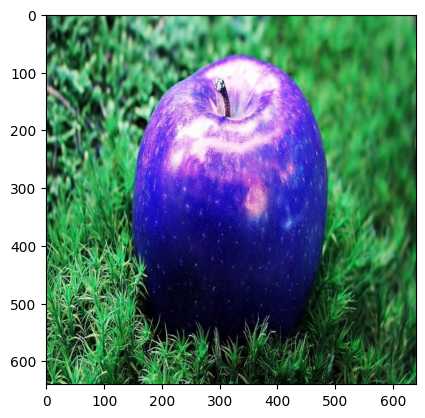

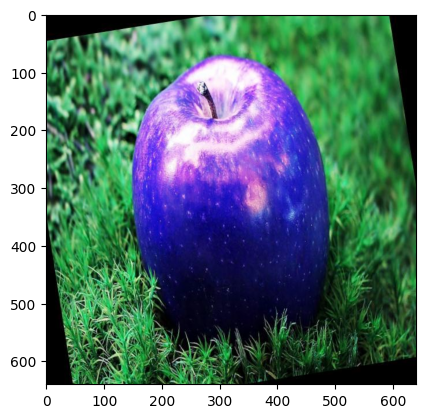

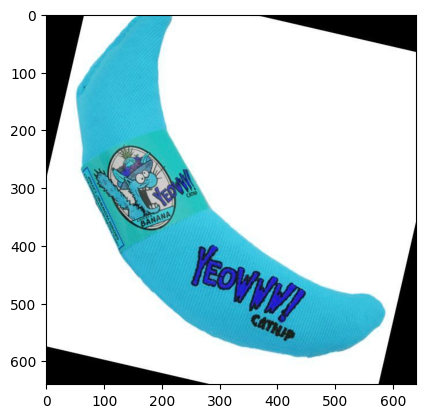

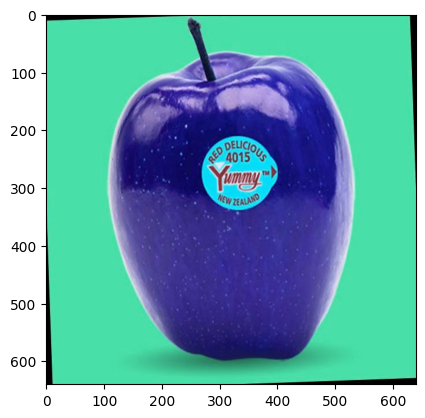

In [10]:
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [11]:
df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (trees).

for idx, anno in enumerate(glob.glob(label_dir+"/train" + '/*.xml')):

    trees = ET.parse(anno)

    print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

Streaming output truncated to the last 5000 lines.
<Element 'pose' at 0x7df0bd1427a0>
<Element 'truncated' at 0x7df0bd140ea0>
<Element 'difficult' at 0x7df0bd141c10>
<Element 'occluded' at 0x7df0bd1400e0>
<Element 'bndbox' at 0x7df0bd142110>
<Element 'xmin' at 0x7df0bd140d10>
<Element 'xmax' at 0x7df0bd140130>
<Element 'ymin' at 0x7df0bd140cc0>
<Element 'ymax' at 0x7df0bd142570>
/content/drive/MyDrive/LabFruit/Final_data/labels/train/Screen-Shot-2018-06-08-at-2-34-42-PM_png.rf.564cac9d74c87f6bf42da0edb5854855.xml
<Element 'annotation' at 0x7df0bd1407c0>
<Element 'folder' at 0x7df0bd140220>
<Element 'filename' at 0x7df0bd143150>
<Element 'path' at 0x7df0bd140810>
<Element 'source' at 0x7df0bd141800>
<Element 'database' at 0x7df0bd140bd0>
<Element 'size' at 0x7df0bd142cf0>
<Element 'width' at 0x7df0bd142c00>
<Element 'height' at 0x7df0bd142430>
<Element 'depth' at 0x7df0bd141170>
<Element 'segmented' at 0x7df0bd141a30>
<Element 'object' at 0x7df0bd1431a0>
<Element 'name' at 0x7df0bd14329

In [12]:
df2 = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

for idx, anno in enumerate(glob.glob(label_dir+"/val" + '/*.xml')):

    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df2['label'] += [label]
                    df2['width'] += [width]
                    df2['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df2['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df2['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df2['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df2['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df2['ymax'] += [ymax]

In [13]:
import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,Screen-Shot-2018-06-07-at-2-45-44-PM_png.rf.8e...,rotten_apple,640,640,46,11,576,576
1,Screen-Shot-2018-06-07-at-2-23-51-PM_png.rf.ec...,rotten_apple,640,640,61,35,594,620
2,Screen-Shot-2018-06-07-at-2-35-21-PM_png.rf.44...,rotten_apple,640,640,30,46,621,602
3,Screen-Shot-2018-06-07-at-2-46-22-PM_png.rf.3f...,rotten_apple,640,640,28,98,525,579
4,Screen-Shot-2018-06-07-at-3-05-46-PM_png.rf.65...,rotten_apple,640,640,79,59,563,609


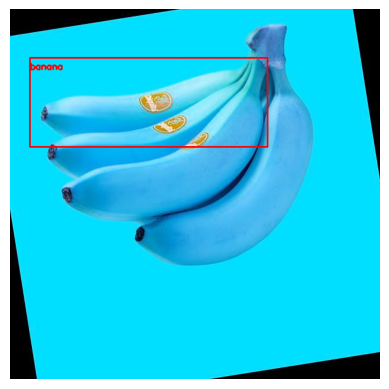

In [14]:
index= 10 #picture to visualize

#import cv2
image = cv2.imread(os.path.join(image_dir,"train", train_df["name"][index]+".jpg"), 1)
# Draw rectangle
cv2.rectangle(image, (train_df['xmin'][index], train_df['ymin'][index]), (train_df['xmax'][index], train_df['ymax'][index]), (255, 0, 0), 2)
# Put label (class_id) near the bbox
label = train_df["label"][index]
cv2.putText(image, str(label), (train_df['xmin'][index], train_df['ymin'][index]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [15]:
train_df["name"][index]
filtered_df = train_df[train_df['name'] == train_df["name"][index]]
print(filtered_df)

                                                 name   label  width  height  \
10  banana_12_jpg.rf.9584067497a0a2c366c99ff1e93a28d0  banana    640     640   
11  banana_12_jpg.rf.9584067497a0a2c366c99ff1e93a28d0  banana    640     640   
12  banana_12_jpg.rf.9584067497a0a2c366c99ff1e93a28d0  banana    640     640   
13  banana_12_jpg.rf.9584067497a0a2c366c99ff1e93a28d0  banana    640     640   

    xmin  ymin  xmax  ymax  
10    34    84   445   238  
11    42    92   458   309  
12    56   128   482   403  
13   181   136   571   467  


In [16]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    290 non-null    object
 1   label   290 non-null    object
 2   width   290 non-null    int64 
 3   height  290 non-null    int64 
 4   xmin    290 non-null    int64 
 5   ymin    290 non-null    int64 
 6   xmax    290 non-null    int64 
 7   ymax    290 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 18.2+ KB


In [17]:
print(train_df['label'].unique())
print(val_df['label'].unique())

['apple' 'banana' 'orange' 'tomato' 'rotten_tomato' 'rotten-banana'
 'rotten-orange' 'rotten_apple']
['rotten_apple' 'rotten-orange' 'rotten-banana' 'apple' 'banana' 'orange'
 'tomato' 'rotten_tomato']


In [18]:
label_map = { 'apple': 0,
            'rotten_apple': 1,
            'banana': 2,
              'rotten-banana':3,
              'orange': 4,
              'rotten-orange': 5,
              'tomato': 6,
              'rotten_tomato' : 7}

train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)

In [19]:
# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]

In [20]:
train_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,apple_85_jpg.rf.fc54cc7d2f2e677b6da0db10f4e96813,apple,640,640,104,58,542,635,0,0.504687,0.541406,0.684375,0.901563
1,banana_11_jpg.rf.cf5e2c7ff7180c36e30cec224b82f727,banana,640,640,134,84,476,559,2,0.476562,0.502344,0.534375,0.742188
2,apple_85_jpg.rf.c78d7f50fe26940350dc5758750fe0ab,apple,640,640,112,65,531,628,0,0.502344,0.541406,0.654687,0.879687
3,apple_88_jpg.rf.d00957cc4db3d97788aa36d47881f21d,apple,640,640,69,191,490,630,0,0.436719,0.641406,0.657813,0.685937
4,apple_95_jpg.rf.5603b455a92fff25aa0686388922b2b6,apple,640,640,20,218,327,620,0,0.271094,0.654687,0.479687,0.628125


In [21]:
#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)

before deleting (train data):  (3271, 13)
after deleting(train_data):  (3271, 13)
before deleting (val data):  (290, 13)
after deleting(val data):  (290, 13)


In [22]:
train_df = train_df.astype(str)
val_df = val_df.astype(str)

In [23]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.txt', 'w') as file:
            file.write(text)

DETECTION WITH YOLO

In [24]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [25]:
from ultralytics import YOLO

In [26]:
model = YOLO('yolov8s.pt') # pretrained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 226MB/s]


In [27]:
%%writefile config.yaml
path: /content/drive/MyDrive/LabFruit/Final_data
train: /content/drive/MyDrive/LabFruit/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/LabFruit/Final_data/images/val

# Classes
nc: 8 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: apple
  1: rotten_apple
  2: banana
  3: rotten-banana
  4: orange
  5: rotten-orange
  6: tomato
  7: rotten_tomato


  # label_map = { 'apple': 0,
  #           'rotten_apple': 1,
  #           'banana': 2,
  #             'rotten-banana':3,
  #             'orange': 4,
  #             'rotten-orange': 5,
  #             'tomato': 6,
  #             'rotten_tomato' : 7}

Writing config.yaml


In [ ]:
#they said to look at yolo training docs before doing this
model.train(data="config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640)